In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
df=pd.read_csv('salaries (5).csv')

In [3]:
df1=df.copy()

In [4]:
df1

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [6]:
from sklearn import preprocessing

In [7]:
le=preprocessing.LabelEncoder()

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
l=['company','job','degree']
for i in l:
    df1[i]=le.fit_transform(df1[i])

In [10]:
df1

,company,job,degree,salary_more_then_100k
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0
5,2,1,1,1
6,0,2,1,0
7,0,1,0,0
8,0,0,0,0
9,0,0,1,1


In [13]:
y=df1['salary_more_then_100k']

In [14]:
x=df1.drop('salary_more_then_100k',axis=1)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
model=LogisticRegression()

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=.8,random_state=1)

In [19]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [20]:
model.score(xtest,ytest)

0.75

In [24]:
a=model.predict([[2,2,0]])

C:\Users\aftha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [25]:
a

array([0], dtype=int64)

In [27]:
y_act=ytest
y_pred=model.predict(xtest)
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_act,y_pred)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

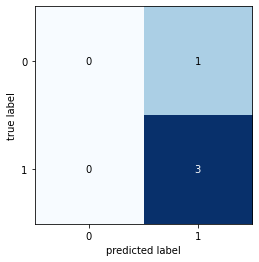

In [30]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(cf)